In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')



In [122]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Exclude rows where the 'race' column has '?' and 'Other'

In [123]:
df = df[df['race'] != 'Other']
df = df[df['race'] != '?']

In [124]:
df.groupby(['race'])['patient_nbr'].count().sort_values(ascending=False)

race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Asian                641
Name: patient_nbr, dtype: int64

Selected specific columns to work

In [140]:
df2=df[['patient_nbr','race','age','gender','time_in_hospital','readmitted']]
df2.head()

,patient_nbr,race,age,gender,time_in_hospital,readmitted
0,8222157,Caucasian,[0-10),Female,1,NO
1,55629189,Caucasian,[10-20),Female,3,>30
2,86047875,AfricanAmerican,[20-30),Female,2,NO
3,82442376,Caucasian,[30-40),Male,2,NO
4,42519267,Caucasian,[40-50),Male,1,NO


In [126]:
df2.isnull().sum()

patient_nbr         0
race                0
age                 0
gender              0
time_in_hospital    0
readmitted          0
dtype: int64

In [127]:
hispanic = df2[df2['race'] == 'Hispanic']

In [146]:
all_races = df2[df2['race'] != 'Other']

In [192]:
asian = df2[df2['race'] == 'Asian']

In [147]:
all_races.describe()

,patient_nbr,time_in_hospital
count,9.798700e+04,97987.000000
mean,5.423244e+07,4.400339
std,3.832793e+07,2.986149
min,1.350000e+02,1.000000
25%,2.344336e+07,2.000000
50%,4.568562e+07,4.000000
75%,8.749452e+07,6.000000
max,1.895026e+08,14.000000


In [148]:
hispanic.describe()

,patient_nbr,time_in_hospital
count,2.037000e+03,2037.000000
mean,6.154605e+07,4.059892
std,4.443959e+07,2.824838
min,1.300500e+04,1.000000
25%,2.359229e+07,2.000000
50%,5.675710e+07,3.000000
75%,9.584839e+07,5.000000
max,1.887556e+08,14.000000


In [131]:
asian.describe()

,patient_nbr,time_in_hospital
count,6.410000e+02,641.000000
mean,7.402927e+07,3.995320
std,4.699916e+07,2.937097
min,1.176570e+05,1.000000
25%,3.518412e+07,2.000000
50%,7.509539e+07,3.000000
75%,1.033065e+08,5.000000
max,1.893494e+08,14.000000


Visualization of Days in Hospital by Race
(Hispanic, Asian and All races)

Text(7.694444444444452, 0.5, 'Count')

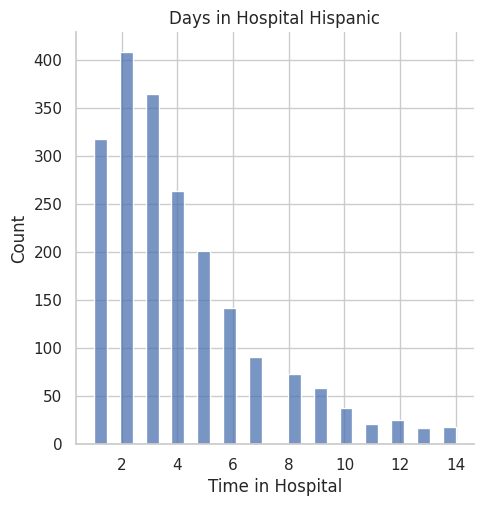

In [186]:
sns.displot(hispanic['time_in_hospital'])
plt.title('Days in Hospital Hispanic')
plt.xlabel('Time in Hospital')
plt.ylabel('Count')

Text(7.819444444444452, 0.5, 'Count')

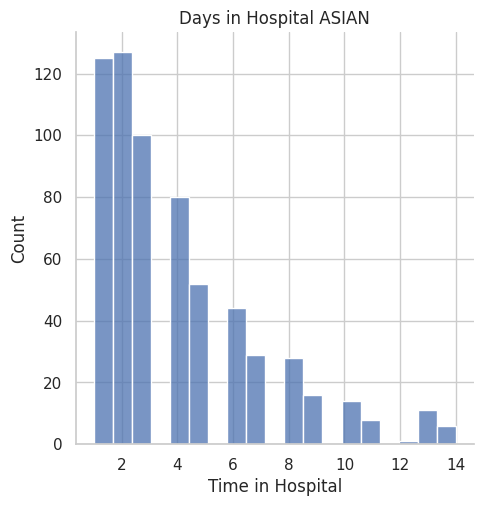

In [185]:
sns.displot(asian['time_in_hospital'])
plt.title('Days in Hospital ASIAN')
plt.xlabel('Time in Hospital')
plt.ylabel('Count')


In [189]:
hispanic_asian = df2[df2['race'].isin(['Hispanic', 'Asian'])]

relationships between Race Asian and Hispanic variables

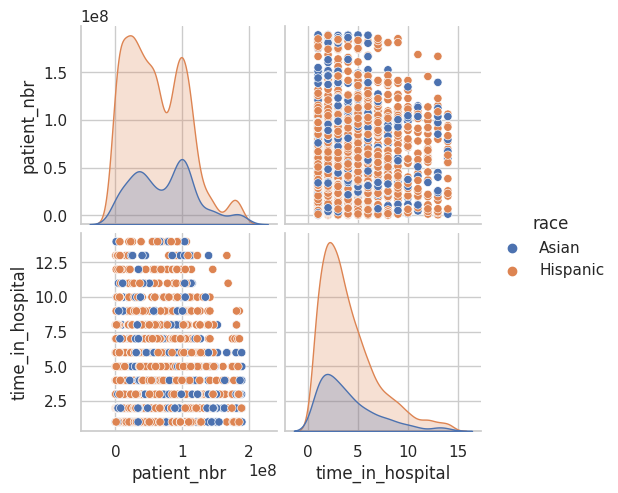

In [193]:
sns.pairplot(hispanic_asian, hue='race')


comparison the average time in the hospital across different age groups and races

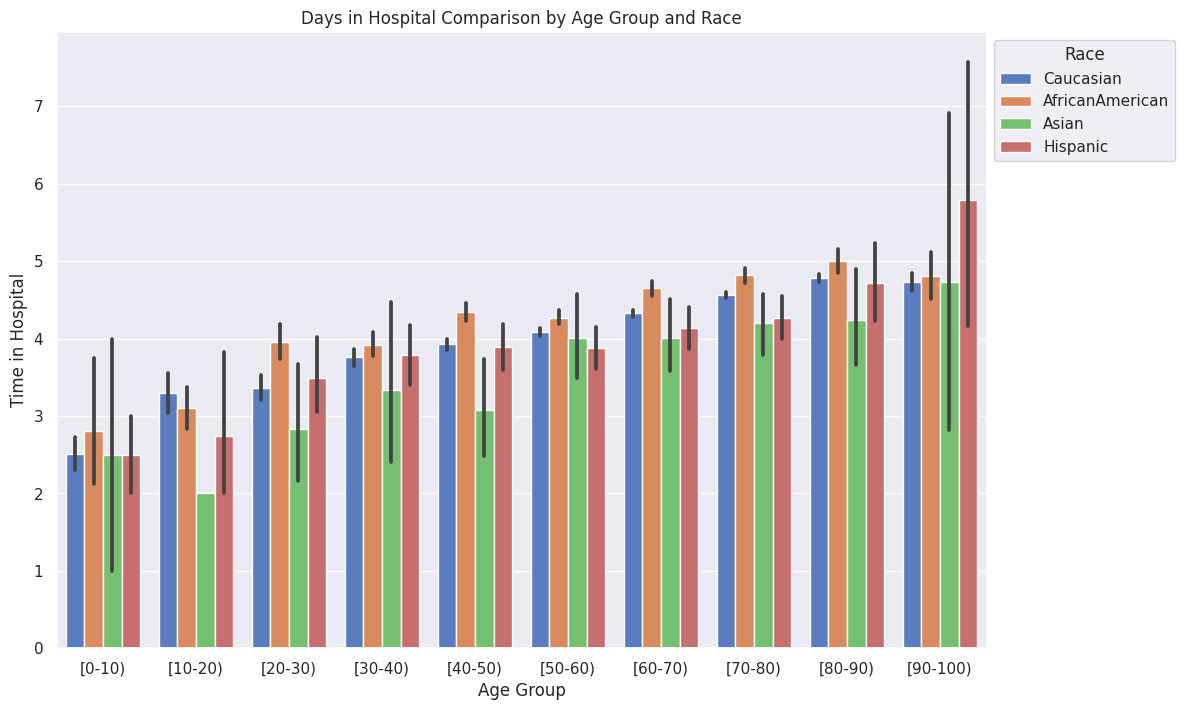

In [175]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.0)
ax = sns.barplot(data=df2, x='age', y='time_in_hospital', hue='race', palette='muted')
plt.title('Days in Hospital Comparison by Age Group and Race')
plt.xlabel('Age Group')
plt.ylabel('Time in Hospital')
plt.legend(title='Race', bbox_to_anchor=(1, 1))

In this project, I performed an analysis on diabetes-related with the amount of time they spend in hospital by race and age.

Grouped the data by race and checked the distribution of patients among different racial categories.
Selected specific columns of interest for further analysis.

Described the data for all races, Hispanic individuals, and Asian individuals

Checked hospital stay distribution for Hispanic and Asian individuals.
Explored relationships between variables for these groups.
Compared average hospital stay across age groups and races.

On average, people tend to be hospitalized for a shorter duration, primarily between 2 and 3 days. However, there is an interesting trend where the hospitalization duration tends to increase with age, particularly after 60 years. This suggests that older individuals may, on average, require longer hospital stays compared to younger age groups.

Asian Individuals tend to have hospital stays below the overall average, especially for those under 60 years.

African American Individuals tend to be hospitalized around the average until the age of 40, show an increase in hospital stays above the average after 40 years, with a noticeable difference in the 60 to 80 age range.

Hispanic Individuals generally stay around the average after 40 years and show significant difference in hospitalization duration for individuals in the 90 to 100 age range.